# SuryaOCR(Table OCR)

In [ ]:
!pip install surya-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


In [ ]:
from PIL import Image
from surya.ocr import run_ocr
from surya.model.detection.model import load_model as load_det_model, load_processor as load_det_processor
from surya.model.recognition.model import load_model as load_rec_model
from surya.model.recognition.processor import load_processor as load_rec_processor

det_processor, det_model = load_det_processor(), load_det_model()
rec_model, rec_processor = load_rec_model(), load_rec_processor()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/675 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/154M [00:00<?, ?B/s]

Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


config.json:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/941M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

Loaded recognition model vikp/surya_rec2 on device cuda with dtype torch.float16


preprocessor_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

## Image OCR (Table in Image)

In [ ]:
image = Image.open("/content/table-img-nepali.png")
langs = ["ne","en"]
predictions = run_ocr([image], [langs], det_model, det_processor, rec_model, rec_processor)

Recognizing Text: 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]


(-0.5, 856.5, 434.5, -0.5)

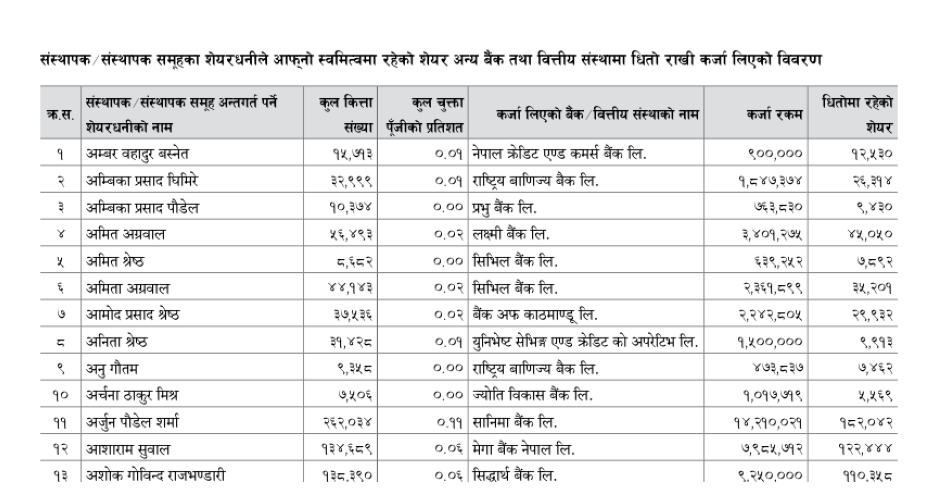

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/table-img-nepali.png")
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis("off")


In [ ]:
# Define classes for bounding boxes and text lines
class BBox:
    def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max

class TextLine:
    def __init__(self, bbox, text):
        self.bbox = bbox
        self.text = text

# Process predictions to extract bounding boxes and text
def process_predictions(data):
    processed_data = []
    for pred in data:
        bbox = BBox(pred.bbox[0], pred.bbox[1], pred.bbox[2], pred.bbox[3])
        processed_data.append(TextLine(bbox, pred.text))
    return processed_data

In [ ]:
# Group text into rows based on bounding box proximity (y_min values)
def group_into_rows(predictions):
    predictions = process_predictions(list(predictions[0])[0][1])  # Extract results for the first image
    sorted_predictions = sorted(predictions, key=lambda x: (x.bbox.y_min, x.bbox.x_min))  # Sort by y and then x

    rows = []
    current_row = []
    prev_y_min = sorted_predictions[0].bbox.y_min if sorted_predictions else 0

    for pred in sorted_predictions:
        if pred.bbox.y_min - prev_y_min > 20:  # Threshold to identify a new row
            rows.append(current_row)
            current_row = []
        current_row.append(pred)
        prev_y_min = pred.bbox.y_min

    if current_row:
        rows.append(current_row)

    return rows

# Format rows into tab-separated text
def format_rows_as_text(rows):
    formatted_rows = []
    for row in rows:
        row_text = "\t".join([item.text for item in sorted(row, key=lambda x: x.bbox.x_min)])
        formatted_rows.append(row_text)
    return "\n".join(formatted_rows)

# Main processing
rows = group_into_rows(predictions)
output_text = format_rows_as_text(rows)

In [ ]:
print(output_text)

संस्थापक ⁄ संस्थापक समूहका शेयरधनीले आफ्नो स्वमित्वमा रहेको शेयर अन्य बैंक तथा वित्तीय संस्थामा धितो राखी कर्जा लिएको विवरण
ऋ.स.	संस्थापक / संस्थापक समूह अन्तगर्त पर्ने	शेयरधनीको नाम	कल कित्ता	संख्या	पँजीको प्रतिशत	कल चुन्ता	कर्जा लिएको वैक वित्तीय संस्थाको नाम	कजा रकम	धितोमा रहेको	शेयर
d	अम्बर वहादुर बस्नेत	१५.७१३	0.09	नेपाल ऋेडिट एण्ड कमर्स बैंक लि.	900,000	१२,५३०
 २	अम्बिका प्रसाद घिमिरे	३२.९९९	0.09	| राष्ट्रिय बाणिज्य बैक लि.	9,5 ४७,३७४	२६, ३१ ४
  	अम्बका प्रसाद पौडेल	९०.३७४	0.00 प्रभ बैंक लि.	 ७६३,८३०	९,४३०
 ४	अमित अग्रवाल	५६,४९३	0.0२ | लक्ष्मी बैंक लि.	३.४०१.२७५	४५,०५०
 प्र	अमित श्रेष्ठ	८,६८२	0.00 | सिभिल बैंक लि.	६३९,२५ २	७,८९२
  	अमिता अग्रवाल	४४.१४३	0.0२ सिभिल बैंक लि.	२,३६१,८९९	३५.२०१
  	आमोद प्रसाद श्रेष्ठ	३७,५ ३६	०.०२ बैंक अफ काठमाण्डू लि.	२,२४२,८०५	२९,९३२
८	अनिता श्रेष्ठ	३१.४२८	0.09	युनिभेष्ट सेभिङ्ग एण्ड ऋेडिट को अपरेटिभ लि.	9.400.000	९,९१३
o	अनु गौतम	९.३५ ८	0,00	| राष्ट्रिय बाणिज्य बैक लि.	४७३,८३७	७,४६२
90	अर्चना ठाक्र मिश्र	७५०६	0.00 | ज्योति विकास बैंक लि.	9,099,399	५,

In [ ]:
# Save the output text to a file
output_file_path = "/content/ocr_rowwise_output.txt"
with open(output_file_path, "w", encoding="utf-8") as f:
    f.write(output_text)

print(f"Row-wise OCR results saved to '{output_file_path}'")

Row-wise OCR results saved to '/content/ocr_rowwise_output.txt'


## PDF OCR(Table in PDF)

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 64.0 MB/s eta 0:00:00


In [ ]:
!pip install pillow

In [ ]:
!pip install surya-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


In [ ]:
from surya.ocr import run_ocr
from surya.model.detection.model import load_model as load_det_model, load_processor as load_det_processor
from surya.model.recognition.model import load_model as load_rec_model
from surya.model.recognition.processor import load_processor as load_rec_processor

det_processor, det_model = load_det_processor(), load_det_model()
rec_model, rec_processor = load_rec_model(), load_rec_processor()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/675 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/154M [00:00<?, ?B/s]

Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32


config.json:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/941M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

Loaded recognition model vikp/surya_rec2 on device cpu with dtype torch.float32


preprocessor_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

In [ ]:
import fitz  # PyMuPDF
from PIL import Image

def resize_image(image, max_width=1024, max_height=1024):
    width, height = image.size
    aspect_ratio = width / height

    if width > max_width or height > max_height:
        if aspect_ratio > 1:  # Landscape
            new_width = max_width
            new_height = int(max_width / aspect_ratio)
        else:  # Portrait
            new_height = max_height
            new_width = int(max_height * aspect_ratio)
        image = image.resize((new_width, new_height), Image.LANCZOS)

    return image

def preprocess_image(image):
    image = image.convert("L")  # Convert to grayscale
    image = image.point(lambda x: 0 if x < 128 else 255)  # Binarize
    return image

def pdf_to_images(pdf_path, dpi=150, max_width=1024, max_height=1024):
    pdf_document = fitz.open(pdf_path)
    for page_number in range(len(pdf_document)):
        page = pdf_document[page_number]
        pixmap = page.get_pixmap(matrix=fitz.Matrix(dpi / 72, dpi / 72))
        image = Image.frombytes("RGB", [pixmap.width, pixmap.height], pixmap.samples)

        # Resize and preprocess the image
        resized_image = resize_image(image)
        processed_image = preprocess_image(resized_image)

        yield processed_image

pdf_path = "/content/table_data.pdf"
images = pdf_to_images(pdf_path)

There are 3 images in the PDF.


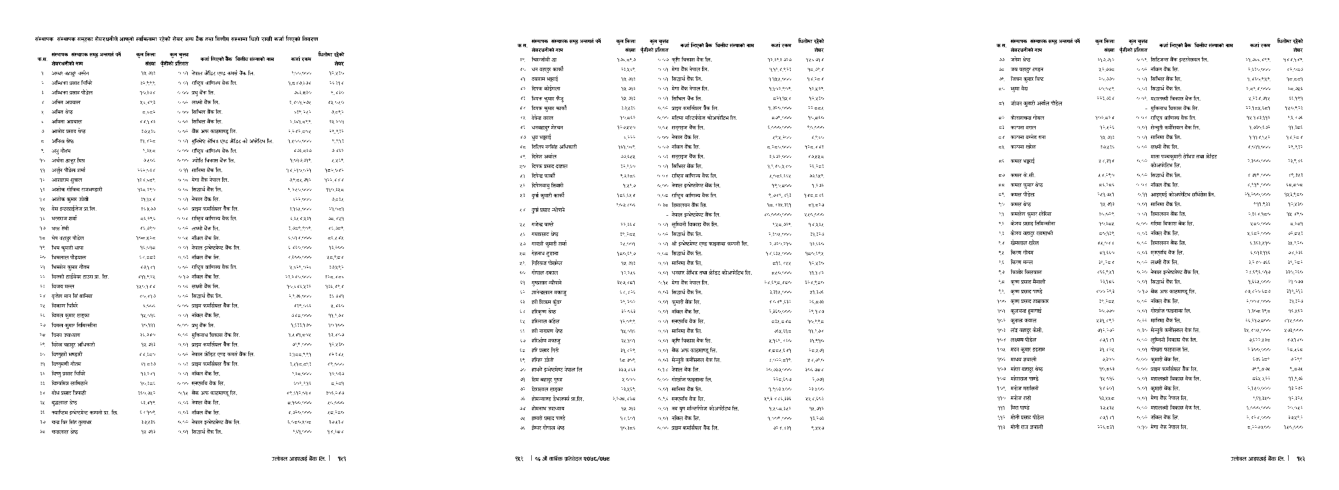

In [ ]:
images2 = list(pdf_to_images(pdf_path))

if len(images2) == 1:
    print("It appears to be a single image spanning all pages.")
    plt.figure(figsize=(20, 10))  # Adjust size as needed
    plt.imshow(images2[0])
    plt.axis('off')
    plt.show()
else:
    print(f"There are {len(images2)} images in the PDF.")
    fig, axes = plt.subplots(1, len(images2), figsize=(15, 5))
    for i, image in enumerate(images2):
        img_array = np.array(image)
        axes[i].imshow(img_array, cmap='gray')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install torch

In [ ]:
def free_gpu_memory():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

In [ ]:
class BBox:
    def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max

class TextLine:
    def __init__(self, bbox, text):
        self.bbox = bbox
        self.text = text

def process_predictions(data):
    """Extract bounding boxes and text from predictions."""
    processed_data = []
    for pred in data:
        bbox = BBox(pred.bbox[0], pred.bbox[1], pred.bbox[2], pred.bbox[3])
        processed_data.append(TextLine(bbox, pred.text))
    return processed_data

def group_into_rows(predictions):
    """Group predictions into rows based on bounding box proximity."""
    predictions = process_predictions(list(predictions[0])[0][1])  # Extract results for the first image
    sorted_predictions = sorted(predictions, key=lambda x: (x.bbox.y_min, x.bbox.x_min))  # Sort by y and x

    rows = []
    current_row = []
    prev_y_min = sorted_predictions[0].bbox.y_min if sorted_predictions else 0

    for pred in sorted_predictions:
        if pred.bbox.y_min - prev_y_min > 20:  # New row threshold
            rows.append(current_row)
            current_row = []
        current_row.append(pred)
        prev_y_min = pred.bbox.y_min

    if current_row:
        rows.append(current_row)

    return rows

def format_rows_as_text(rows):
    """Format grouped rows into tab-separated text."""
    formatted_rows = []
    for row in rows:
        row_text = "\t".join([item.text for item in sorted(row, key=lambda x: x.bbox.x_min)])
        formatted_rows.append(row_text)
    return "\n".join(formatted_rows)

In [ ]:
import torch

def ocr_pdf(pdf_path, output_file, langs=["ne"]):
    """Perform OCR on each page of the PDF and save results."""
    with open(output_file, "w", encoding="utf-8") as file:
        for page_num, image in enumerate(pdf_to_images(pdf_path)):
            print(f"Processing page {page_num + 1}...")

            # Run OCR on the image
            predictions = run_ocr([image], [langs], det_model, det_processor, rec_model, rec_processor)

            # Group rows and format text
            rows = group_into_rows(predictions)
            output_text = format_rows_as_text(rows)

            # Write results to file
            file.write(f"\n\nPage {page_num + 1}\n{output_text}\n")

            # Free GPU memory
            free_gpu_memory()

    print(f"Extraction completed. Results saved in {output_file}")

pdf_path = "/content/table_data.pdf"  # Path to your PDF
output_file = "/content/table_ocr_output_nepali.txt"  # Path to save the output

ocr_pdf(pdf_path, output_file)

Processing page 1...


Recognizing Text: 100%|██████████| 8/8 [23:36<00:00, 177.01s/it]


NameError: name 'torch' is not defined

In [ ]:
from google.colab import files
files.download(output_file)


In [ ]:
# Print the extracted text
with open(output_file_path, "r", encoding="utf-8") as file:
    print(file.read())